<a href="https://colab.research.google.com/github/MingzheHu-Duke/Retinopathy-Detection-from-UWF-Retinal-Images/blob/main/OPTOS_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
import os
path = "/content/gdrive/MyDrive/OPTOS_code_1_5"
os.chdir(path)
os.listdir(path)

['Copy of OPTOS_Image.zip',
 'OPTOS_Image',
 'OPTOS_list .xlsx',
 'Copy of demo.ipynb',
 'OPTOS_Image.zip',
 'Copy of demo_1_5_epoch_10000.ipynb',
 'augmented_image',
 'demo_1_5.ipynb',
 'model.png',
 'saved_model_1_5',
 'saved_model',
 'OPTOS_list_1_25 .xlsx',
 'demo_crossvalidation.ipynb',
 'demo_1_25.ipynb',
 'OPTOS_Image_3_15.zip',
 'OPTOS_Image_JPG',
 'OPTOS_list_3_15.xlsx']

In [ ]:
# !unzip OPTOS_Image_3_15.zip

In [ ]:
ls

 augmented_image/                      OPTOS_Image_3_15.zip
'Copy of demo_1_5_epoch_10000.ipynb'   OPTOS_Image_JPG/
'Copy of demo.ipynb'                   OPTOS_Image.zip
'Copy of OPTOS_Image.zip'             'OPTOS_list_1_25 .xlsx'
 demo_1_25.ipynb                       OPTOS_list_3_15.xlsx
 demo_1_5.ipynb                       'OPTOS_list .xlsx'
 demo_crossvalidation.ipynb            saved_model/
 model.png                             saved_model_1_5/
 OPTOS_Image/


In [ ]:
# Load the packages
import pandas as pd
import numpy as np
import cv2
from imgaug import augmenters as iaa #引入数据增强的包
import imgaug as ia
ia.seed(5)

# Data Augmentation
rotate = iaa.Affine(rotate=(-25, 25))

fliplr = iaa.Sequential([
    # Crop the image from 0 to 16px 
    # from each side (selected randomly)
    iaa.Crop(px=(0, 16)), 
    # Flip the image horizontally
    iaa.Fliplr(0.5),  
    # Use 0 to 3.0 sigma to blur the image  
    iaa.GaussianBlur(sigma=(0, 3.0))
])

flipud = iaa.Sequential([
    # Crop the image from 0 
    # to 16px from each side (selected randomly)
    iaa.Crop(px=(0, 16)),      
    # Flip the image upside down 
    iaa.Flipud(0.5), 
    # Use 0 to 3.0 sigma to blur the image          
    iaa.GaussianBlur(sigma=(0, 3.0))
])

# Read in the data
data = pd.read_excel('OPTOS_list_3_15.xlsx')
xdata = []
ydata = []
for index, row in data.iterrows():
  img1 = cv2.imdecode(np.fromfile('OPTOS_Image_JPG/'+row['File_Name'], dtype=np.uint8), cv2.IMREAD_COLOR)
  img1 = cv2.resize(img1, (100, 100), interpolation=cv2.INTER_CUBIC)
  img1_lr = fliplr(image=img1)
  img1_ud = flipud(image=img1)
  img2 = rotate(image=img1)
  img2_lr = fliplr(image=img2)
  img2_ud = flipud(image=img2)
  img3 = rotate(image=img1)
  img3_lr = fliplr(image=img3)
  img3_ud = flipud(image=img3)
  img4 = rotate(image=img1)
  img4_lr = fliplr(image=img4)
  img4_ud = flipud(image=img4)
  xdata.append(img1)
  xdata.append(img1_lr)
  xdata.append(img1_ud)
  xdata.append(img2)
  xdata.append(img2_lr)
  xdata.append(img2_ud)
  xdata.append(img3)
  xdata.append(img3_lr)
  xdata.append(img3_ud)
  xdata.append(img4)
  xdata.append(img4_lr)
  xdata.append(img4_ud)
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  ydata.append(row['Pathology (1/0)'])
  
 

In [ ]:
# Peek the dimension of the train and test data
xdata = np.array(xdata)
ydata = np.array(ydata)
print(xdata.shape)
print(ydata.shape)

(5172, 100, 100, 3)
(5172,)


In [ ]:
from __future__ import print_function
import keras
import numpy as np
from scipy import io
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.layers.core import Lambda
from keras import backend
from keras.utils import np_utils
K.set_learning_phase(1)

# Input image dimensions
img_rows, img_cols = 100, 100

# Scramble data
xdata = xdata
ydata = ydata
num = len(ydata)
index = np.arange(num)
np.random.shuffle(index)
xdata = xdata[index,:]
ydata = ydata[index]
ydata = np_utils.to_categorical(ydata)
num_classes = ydata.shape[1]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
# Construct training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata,test_size=0.25,random_state=654)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Add noise
x_train = x_train.astype('float32') / 255. + 0.05*np.random.random([x_train.shape[0],img_rows, img_cols, 3])
x_test = x_test.astype('float32') / 255. + 0.05*np.random.random([x_test.shape[0],img_rows, img_cols, 3])
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

def abs_backend(inputs):
    return K.abs(inputs)

def expand_dim_backend(inputs):
    return K.expand_dims(K.expand_dims(inputs,1),1)

def sign_backend(inputs):
    return K.sign(inputs)

def pad_backend(inputs, in_channels, out_channels):
    pad_dim = (out_channels - in_channels)//2
    inputs = K.expand_dims(inputs,-1)
    inputs = K.spatial_3d_padding(inputs, ((0,0),(0,0),(pad_dim,pad_dim)), 'channels_last')
    return K.squeeze(inputs, -1)

# Residual shrinkage module
def residual_shrinkage_block(incoming, nb_blocks, out_channels, downsample=False,
                             downsample_strides=2):
    
    residual = incoming
    in_channels = incoming.get_shape().as_list()[-1]
    
    for i in range(nb_blocks):
        
        identity = residual
        
        if not downsample:
            downsample_strides = 1
        
        residual = BatchNormalization()(residual)
        residual = Activation('relu')(residual)
        residual = Conv2D(out_channels, 3, strides=(downsample_strides, downsample_strides), 
                          padding='same', kernel_initializer='he_normal', 
                          kernel_regularizer=l2(1e-4))(residual)
        
        residual = BatchNormalization()(residual)
        residual = Activation('relu')(residual)
        residual = Conv2D(out_channels, 3, padding='same', kernel_initializer='he_normal', 
                          kernel_regularizer=l2(1e-4))(residual)
        
        # Calculate the mean
        residual_abs = Lambda(abs_backend)(residual)
        abs_mean = GlobalAveragePooling2D()(residual_abs)
        
        # Calculate the scale factor
        scales = Dense(out_channels, activation=None, kernel_initializer='he_normal', 
                       kernel_regularizer=l2(1e-4))(abs_mean)
        scales = BatchNormalization()(scales)
        scales = Activation('relu')(scales)
        scales = Dense(out_channels, activation='sigmoid', kernel_regularizer=l2(1e-4))(scales)
        scales = Lambda(expand_dim_backend)(scales)
        
        # Calculate the threshold
        thres = keras.layers.multiply([abs_mean, scales])
        
        # Soft thresholding
        sub = keras.layers.subtract([residual_abs, thres])
        zeros = keras.layers.subtract([sub, sub])
        n_sub = keras.layers.maximum([sub, zeros])
        residual = keras.layers.multiply([Lambda(sign_backend)(residual), n_sub])
        
        # Downsampling
        if downsample_strides > 1:
            identity = AveragePooling2D(pool_size=(1,1), strides=(2,2))(identity)
            
        # Matching channel
        if in_channels != out_channels:
            identity = Lambda(pad_backend, arguments={'in_channels':in_channels,'out_channels':out_channels})(identity)
        
        residual = keras.layers.add([residual, identity])
    
    return residual


# Define the model
inputs = Input(shape=input_shape)
net = Conv2D(8, 3, padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(1e-4))(inputs)
net = residual_shrinkage_block(net, 1, 8, downsample=True)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = GlobalAveragePooling2D()(net)
outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=l2(1e-4))(net)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

early_stopping_monitor = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2000,
    verbose=1,
    baseline=None,
    restore_best_weights=True
)

history = model.fit(x_train, y_train, batch_size=200, epochs=5000, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stopping_monitor])

# get results
K.set_learning_phase(0)
DRSN_train_score = model.evaluate(x_train, y_train, batch_size=100, verbose=0)
print('Train loss:', DRSN_train_score[0])
print('Train accuracy:', DRSN_train_score[1])
DRSN_test_score = model.evaluate(x_test, y_test, batch_size=100, verbose=0)
print('Test loss:', DRSN_test_score[0])
print('Test accuracy:', DRSN_test_score[1])

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 1035/5000
20/20 [==============================] - 1s 30ms/step - loss: 0.3103 - accuracy: 0.8682 - val_loss: 1.0372 - val_accuracy: 0.6094
Epoch 1036/5000
20/20 [==============================] - 1s 31ms/step - loss: 0.3021 - accuracy: 0.8795 - val_loss: 0.6427 - val_accuracy: 0.7486
Epoch 1037/5000
20/20 [==============================] - 1s 29ms/step - loss: 0.3127 - accuracy: 0.8651 - val_loss: 0.5723 - val_accuracy: 0.7564
Epoch 1038/5000
20/20 [==============================] - 1s 30ms/step - loss: 0.2881 - accuracy: 0.8802 - val_loss: 0.5953 - val_accuracy: 0.7525
Epoch 1039/5000
20/20 [==============================] - 1s 29ms/step - loss: 0.3033 - accuracy: 0.8677 - val_loss: 0.7936 - val_accuracy: 0.6891
Epoch 1040/5000
20/20 [==============================] - 1s 30ms/step - loss: 0.2987 - accuracy: 0.8746 - val_loss: 0.8212 - val_accuracy: 0.6790
Epoch 1041/5000
20/20 [==============================] - 1s 30ms/step - loss: 0.2826 - accuracy: 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Train loss: 0.2686050832271576
Train accuracy: 0.8878576755523682
Test loss: 0.39655187726020813
Test accuracy: 0.8275328874588013


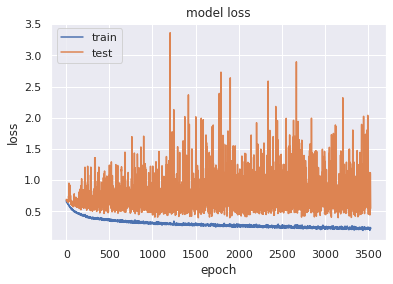

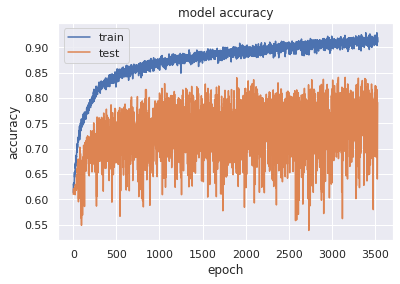

In [ ]:
# Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Confusion matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pre_test = model.predict(x_test)
pre_test = np.argmax(pre_test,axis=1)
y_test = np.argmax(y_test,axis=1)
cm_test = confusion_matrix(y_test,pre_test)
sns.set()
f,ax=plt.subplots()
sns.heatmap(cm_test,annot=True,ax=ax) 
ax.set_title('test confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true')
plt.savefig("cm_3_15_0_1.tiff", dpi=300)

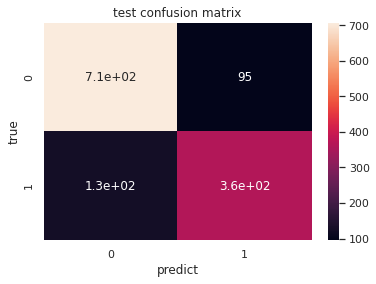

In [ ]:
# Plot the Confusion Matrix
sns.set()
f,ax=plt.subplots()
sns.heatmap(cm_test,annot=True,ax=ax) 
ax.set_title('test confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true')
plt.savefig("cm_3_15_0_1.tiff", dpi=300)

In [ ]:
# Perdormance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
acc = accuracy_score(y_test,pre_test)
recall = recall_score(y_test,pre_test, average='macro')
prc = precision_score(y_test,pre_test, average='macro')
f1 = f1_score(y_test,pre_test, average='macro')
roc_auc = roc_auc_score(y_test,pre_test)
print('Accuracy:',acc)
print('Recall:',recall)
print('Precision:',prc)
print('F1:',f1)
print('roc_auc:',roc_auc)

Accuracy: 0.8275328692962104
Recall: 0.8104268351524447
Precision: 0.8196415030201605
F1: 0.8143955023228
roc_auc: 0.8104268351524446


In [ ]:
# Get CIs following https://machinelearningmastery.com/report-classifier-performance-confidence-intervals/
# Wilson score interval
import numpy as np
def get_CI(metric):
    one_side = 1.96 * np.sqrt(metric*(1-metric)/933)
    return metric + one_side, metric - one_side

acc = 0.8275328692962104
recall = 0.8104268351524447
specificity = 0.7346938776
F1 = 0.8143955023228
auc = 0.8104268351524446

upper_acc, lower_acc = get_CI(acc)
upper_recall, lower_recall = get_CI(recall)
upper_specificity, lower_specificity = get_CI(specificity)
upper_F1, lower_F1 = get_CI(F1)
upper_auc, lower_auc = get_CI(auc)

print("ACC: %.2f ~ (%.2f, %.2f)" %(acc*100, lower_acc*100, upper_acc*100))
print("FNR: %.2f ~ (%.2f, %.2f)" %(100-recall*100, 100-upper_recall*100, 100-lower_recall*100))
print("RECALL: %.2f ~ (%.2f, %.2f)" %(recall*100, lower_recall*100, upper_recall*100))
print("SPEICIFICITY: %.2f ~ (%.2f, %.2f)" %(specificity*100, lower_specificity*100, upper_specificity*100))
print("F1: %.2f ~ (%.2f, %.2f)" %(F1*100, lower_F1*100, upper_F1*100))
print("auc: %.2f ~ (%.2f, %.2f)" %(auc*100, lower_auc*100, upper_auc*100))

ACC: 82.75 ~ (80.33, 85.18)
FNR: 18.96 ~ (16.44, 21.47)
RECALL: 81.04 ~ (78.53, 83.56)
SPEICIFICITY: 73.47 ~ (70.64, 76.30)
F1: 81.44 ~ (78.94, 83.93)
auc: 81.04 ~ (78.53, 83.56)


In [ ]:
pre_test = (model.predict(x_test))[:,1]

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(pre_test))]
# calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, pre_test)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pre_test)

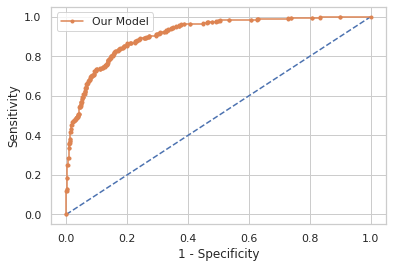

In [ ]:
# plot the roc curve for the model
sns.set_style("whitegrid")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Our Model')
# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
# show the legend
pyplot.legend()
# show the plot
plt.savefig("roc_3_15.tiff", dpi=300)
pyplot.show()

No handles with labels found to put in legend.


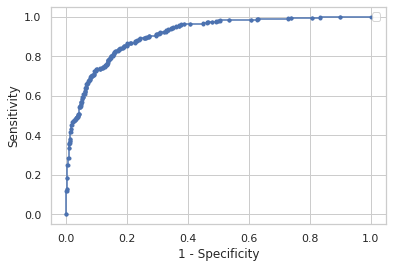

In [ ]:
# plot the roc curve for the model
sns.set_style("whitegrid")
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
pyplot.plot(lr_fpr, lr_tpr, marker='.')
# axis labels
pyplot.xlabel('1 - Specificity')
pyplot.ylabel('Sensitivity')
# show the legend
pyplot.legend()
# show the plot
plt.savefig("roc_3_15_no_diag.tiff", dpi=300)
pyplot.show()

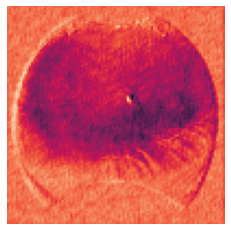

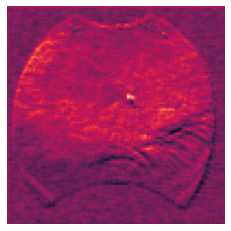

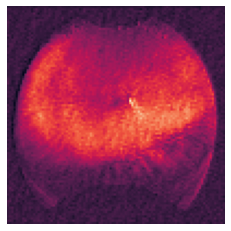

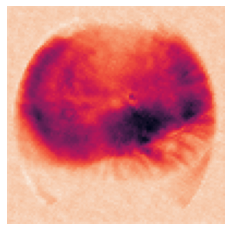

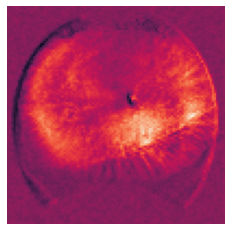

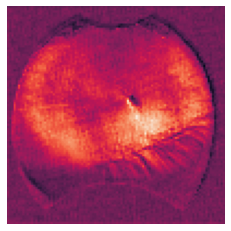

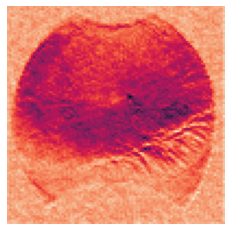

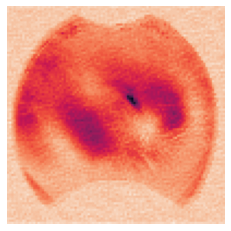

In [ ]:
# feature map
test = x_test[1,:,:,:].reshape(1,100,100,3)
from keras import backend as K
layer_1 = K.function([model.layers[0].input], [model.layers[1].output])
layer_2 = K.function([model.layers[0].input], [model.layers[3].output])
layer_3 = K.function([model.layers[0].input], [model.layers[5].output])
f1 = layer_1([test])[0]
f2 = layer_2([test])[0]
f3 = layer_3([test])[0]
for i in range(8):
  plt.imshow(f1[0,:,:,i]) 
  plt.axis('off')
  plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_3_15') 

INFO:tensorflow:Assets written to: saved_model/model_3_15/assets
